In [ ]:
import numpy as np
import cv2
from PIL import Image
import math
import matplotlib.pyplot as plt

In [ ]:
# to create a matrix of 0s or 1s
# np.ones((28, 28, 3))
np.zeros((28, 28, 3))

# create an RGB image that is all black
# matrix is 28x28 and has 3 color channels
# we create 3 matrixes for 3 color channels.
# each 28 by 28

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
# np.uint8 is a decoding that says that each number is an int and 8 bits
# This creates a black image
image = np.zeros((28,28,3), np.uint8)

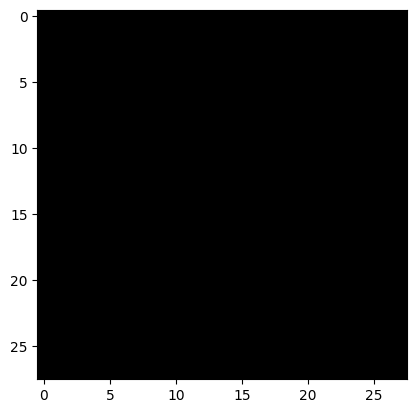

In [ ]:
plt.imshow(image)

In [ ]:
# then we can define some points that has other colors:
image2 = np.zeros((28, 28, 3), np.uint8)
# create a red point
image2[10, 15] = [255, 0, 0]
# create a green point
image2[21, 23] = [0, 255, 0]

y1, x1, y2, x2 = 10, 15, 21, 23

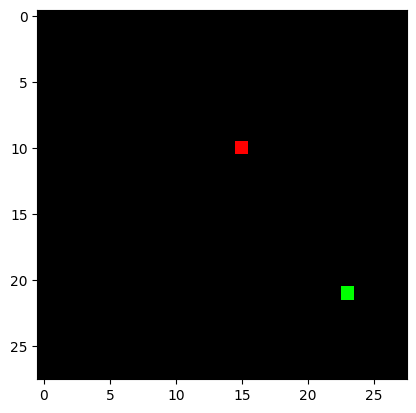

In [ ]:
plt.imshow(image2)

In [ ]:
# Finding distance between the pixels

#  these are the points
y1, x1, y2, x2 = 10, 15, 21, 23

distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
print("Distance:", distance)

Distance: 13.601470508735444


# Alpha Blending

In [ ]:
# Alpha Blending
# Cut an image and use that cut piece to insert it into another image

# So we want to cut the person on the left image and add him in the second image

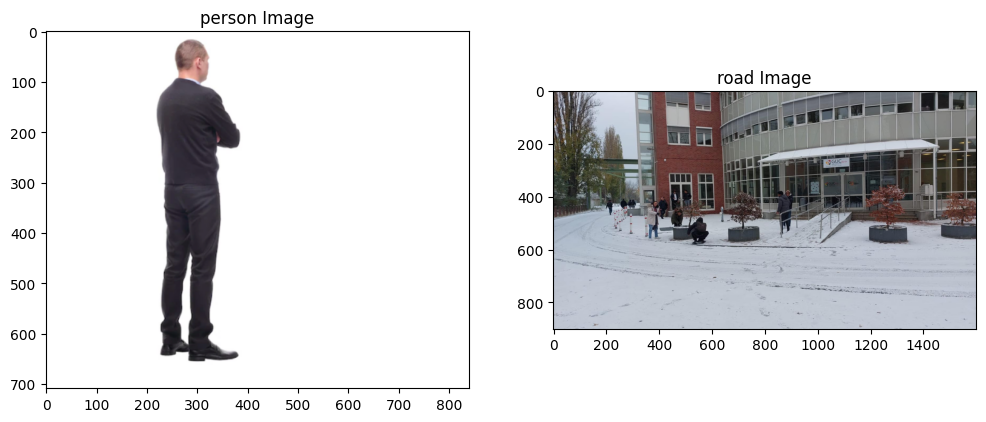

In [ ]:
# Read images and convert from BGR to RGB
person = cv2.imread("student.jpg")
person = cv2.cvtColor(person,cv2.COLOR_BGR2RGB)

road = cv2.imread("giu.jpg")
road = cv2.cvtColor(road,cv2.COLOR_BGR2RGB)

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Display the gray image
axs[0].imshow(person, cmap='gray')
axs[0].set_title('person Image')
# Display the gray image
axs[1].imshow(road, cmap='gray')
axs[1].set_title('road Image')
plt.show()

In [ ]:
# first we will resize the person image, to be the same size as the road image,
# so that when we add them they fit together
person = cv2.resize(person, (road.shape[1], road.shape[0]))

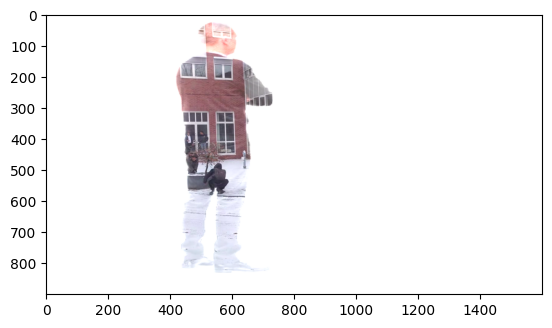

In [ ]:
# Blend the images
# We simply add the 2 images together
result = cv2.add(person,road)
# Display the result
plt.imshow(result)  # Convert BGR to RGB for Matplotlib


# The result is unexpected, because when we add both images, we do in fact add BOTH image pixel intensities ontop of eachother.
# So the values are increased and most of them are 255, since one image is mostly white [255]

# the road image's pixel intensities dont change much, because the person's clothes are black and have an intensity of around 0.
# But the person's head has a higher intensity, thats why we see that part of the road image having a little higher
# intensity than the rest of the road image.

# So how do we CORRECTLY, add both images?

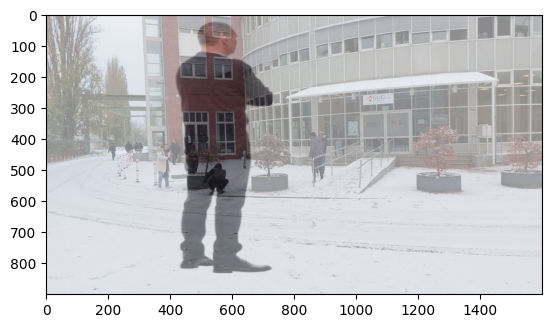

In [ ]:
# We could add an alpha weight (transparency weight aka opacity weight)

# Blend the images
result2 = cv2.addWeighted(person, 0.5, road, 0.5, 0)
# Display the result
plt.imshow(result2)


# But this leads to the so called "ghost effect".

# We can do better than that!

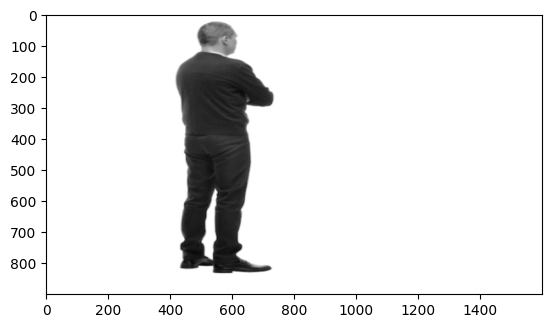

In [ ]:
# First, convert the person image to grayscale.
# We will use that gray image to cut out the shape of the person from the person image and also from the road image

person = cv2.cvtColor(person, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(person, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')

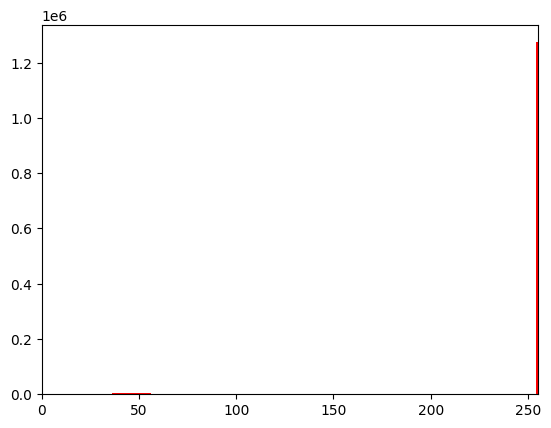

In [ ]:
# Plot the gray_img's histogram

plt.hist(gray_img.flatten(), 255, [0,255], color='r')
plt.xlim([0, 255])
plt.show()

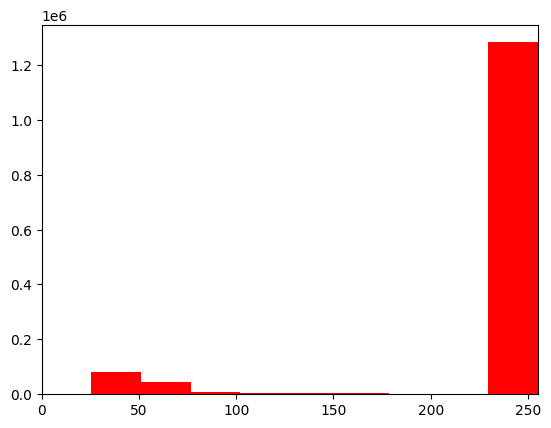

In [ ]:
# We can make the bins smaller to see them more clearly

plt.hist(gray_img.flatten(), 10, [0,255], color='r')
plt.xlim([0, 255])
plt.show()

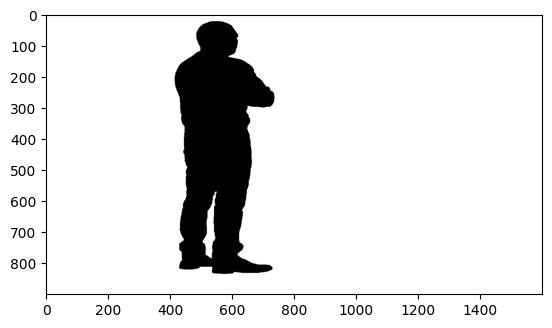

In [ ]:
# Apply binary thresholding
# This, will create a mask of the "person" image, where any value above 250 (threshold),
# will have an intensity of [255] in the mask, and any value under 250, will have
# an intensity of 0

# So, the person in the image, has dark clothes and his skin color too, is under 250,
# That's why the entire person has been turned black [0]

# So the mask will create a cut of the person's shape.
# The mask has only values of 0 or 255 (black or white).


threshold_value = 250
_, mask = cv2.threshold(gray_img, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(mask, cmap='gray')

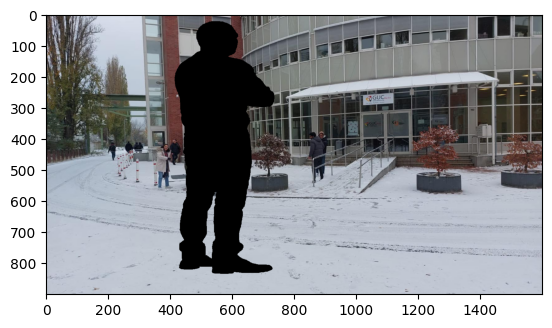

In [ ]:
# We will use that created mask, to cut out the person's shape into the road image

# Bitwise and:
# 0 & 0 = 0
# 0 & 1 = 0
# 1 & 0 = 0
# 1 & 1 = 1

# So, when "anding" the mask, with the road, we will turn the intensities in the road image
# to 0 because any value (from road image) anded with a 0 from the person image, will be 0
road = cv2.bitwise_and(road, road, mask= mask)
plt.imshow(road)

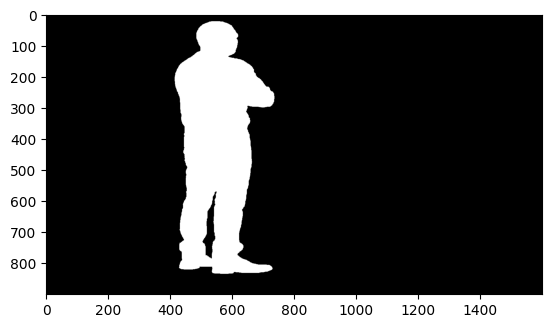

In [ ]:
# Now, we will get the inverse of the previously created mask
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv, cmap='gray')

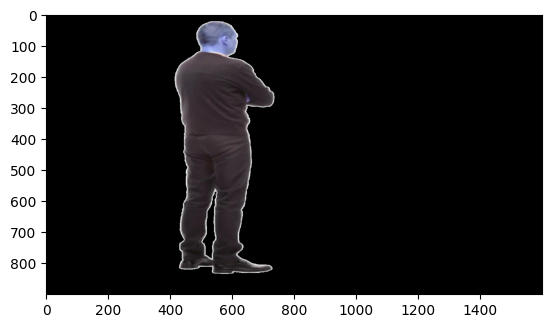

In [ ]:
# Now, that we have the person's shape CUT OUT OF the road image,
# we want to get the person himself cut out from the original person image,
# so that we can add that cut out person into the road image, into the black part
person = cv2.bitwise_and(person, person, mask=mask_inv)
person = cv2.cvtColor(person, cv2.COLOR_BGR2RGB)
plt.imshow(person)

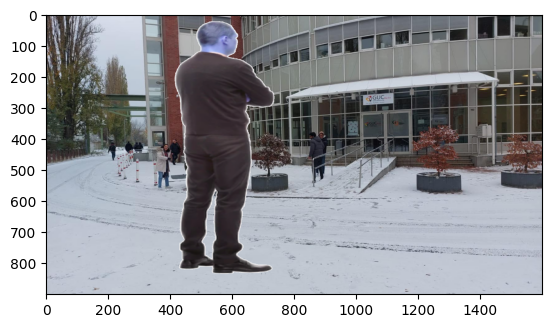

In [ ]:
# Now, we can simply add both images together.
# The images will be correctly added because when we add the values of one image to the black part of the other image,
# we add high values to the value 0, so the added values will stay the same

result = cv2.add(road, person)
plt.imshow(result)